# Assignment on preprocessing

Do the following on titanic dataset
1. Load the dataset into python environment
2. Make ‘PassengerId’ as the index column
3. Check the basic details of the dataset
4. Fill in all the missing values present in all the columns in the dataset
5. Check and handle outliers in at least 3 columns in the dataset
6. Do min max scaling on the feature set (Take ‘Survived’ as target)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1 - Load the dataset into python environment

In [2]:
data=pd.read_csv(r"C:\Users\msham\Documents\Data science\Assignment 4 on preprocessing\titanic_dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### 2 - Make ‘PassengerId’ as the index column

In [3]:
data = data.set_index('PassengerId')
data

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


### 3 - Check the basic details of the dataset

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [5]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 4 - Fill in all the missing values present in all the columns in the dataset

In [7]:
data=pd.read_csv(r"C:\Users\msham\Documents\Data science\Assignment 4 on preprocessing\titanic_dataset.csv")
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
cat_cols=data[['Cabin', 'Embarked']]

In [9]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
imputer=imputer.fit(cat_cols)
cat_cols=imputer.transform(cat_cols)
cat_cols=pd.DataFrame(cat_cols,columns=['Cabin', 'Embarked'])
cat_cols.isna().sum()

Cabin       0
Embarked    0
dtype: int64

In [10]:
data=data.drop(['Cabin', 'Embarked'],axis=1)
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [11]:
data=pd.concat([cat_cols,data],axis=1)
data.isna().sum()

Cabin            0
Embarked         0
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [12]:
num_cols=data[['Age']]
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(num_cols)
num_cols=imputer.transform(num_cols)
num_cols=pd.DataFrame(num_cols,columns=['Age'])
num_cols.isna().sum()

Age    0
dtype: int64

In [13]:
data=data.drop(['Age'],axis=1)
data=pd.concat([num_cols,data],axis=1)
data.isna().sum()

Age            0
Cabin          0
Embarked       0
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

### 5 - Check and handle outliers in at least 3 columns in the dataset

Text(0.5, 1.0, 'Boxplot for Age')

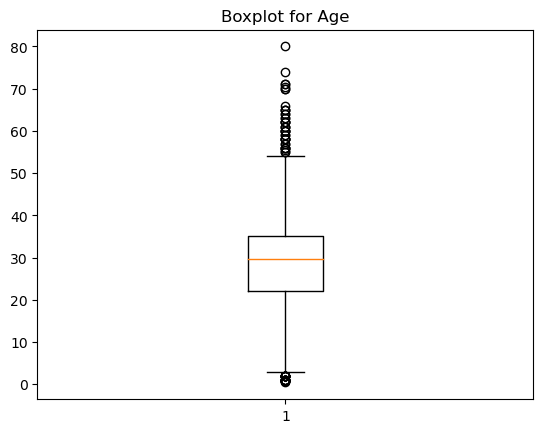

In [14]:
# 1. Age
plt.boxplot(data['Age'])
plt.title('Boxplot for Age')

In [15]:
Q1=np.percentile(data['Age'],25)
Q2=np.percentile(data['Age'],50)
Q3=np.percentile(data['Age'],75)

In [16]:
Q1

22.0

In [17]:
Q2

29.69911764705882

In [18]:
Q3

35.0

In [19]:
IQR=Q3-Q1
IQR

13.0

In [20]:
low_limit=Q1-1.5*IQR
upr_lim=Q3+1.5*IQR
low_limit

2.5

In [21]:
upr_lim

54.5

In [22]:
outlier=[]
for x in data['Age']:
    if ((x>upr_lim)or(x<low_limit)):
        outlier.append(x)
outlier

[2.0,
 58.0,
 55.0,
 2.0,
 66.0,
 65.0,
 0.83,
 59.0,
 71.0,
 70.5,
 2.0,
 55.5,
 1.0,
 61.0,
 1.0,
 56.0,
 1.0,
 58.0,
 2.0,
 59.0,
 62.0,
 58.0,
 63.0,
 65.0,
 2.0,
 0.92,
 61.0,
 2.0,
 60.0,
 1.0,
 1.0,
 64.0,
 65.0,
 56.0,
 0.75,
 2.0,
 63.0,
 58.0,
 55.0,
 71.0,
 2.0,
 64.0,
 62.0,
 62.0,
 60.0,
 61.0,
 57.0,
 80.0,
 2.0,
 0.75,
 56.0,
 58.0,
 70.0,
 60.0,
 60.0,
 70.0,
 0.67,
 57.0,
 1.0,
 0.42,
 2.0,
 1.0,
 62.0,
 0.83,
 74.0,
 56.0]

In [23]:
ind1=data['Age']>upr_lim
data.loc[ind1].index

Int64Index([ 11,  15,  33,  54,  94,  96, 116, 152, 170, 174, 195, 232, 252,
            268, 275, 280, 326, 366, 438, 456, 467, 483, 487, 492, 493, 545,
            555, 570, 587, 625, 626, 630, 647, 659, 672, 684, 694, 745, 772,
            829, 851, 879],
           dtype='int64')

In [24]:
data=data.drop(data.loc[ind1].index)

In [25]:
ind2=data['Age']<low_limit
data=data.drop(data.loc[ind2].index)
data.shape

(825, 12)

Text(0.5, 1.0, 'Boxplot for Age')

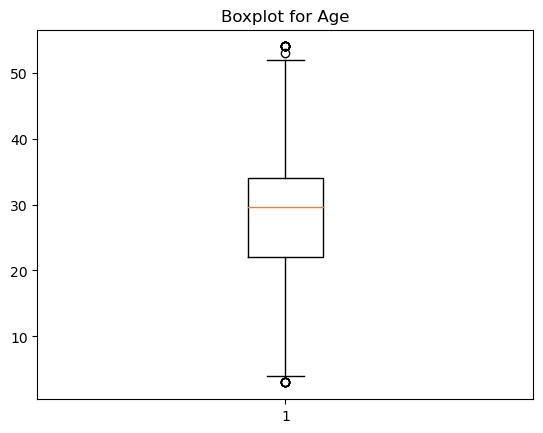

In [26]:
plt.boxplot(data['Age'])
plt.title('Boxplot for Age')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 825 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          825 non-null    float64
 1   Cabin        825 non-null    object 
 2   Embarked     825 non-null    object 
 3   PassengerId  825 non-null    int64  
 4   Survived     825 non-null    int64  
 5   Pclass       825 non-null    int64  
 6   Name         825 non-null    object 
 7   Sex          825 non-null    object 
 8   SibSp        825 non-null    int64  
 9   Parch        825 non-null    int64  
 10  Ticket       825 non-null    object 
 11  Fare         825 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 83.8+ KB


Text(0.5, 1.0, 'Boxplot for SibSp')

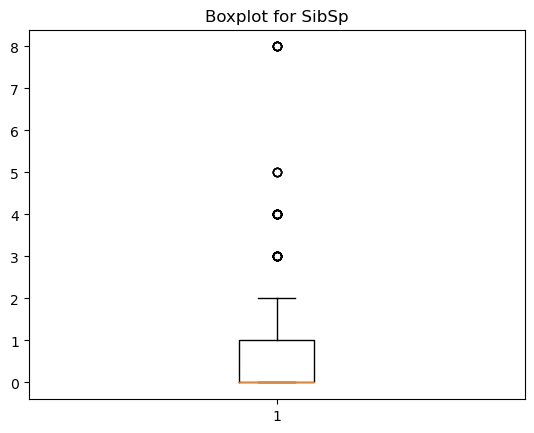

In [28]:
# 2. SibSp
plt.boxplot(data['SibSp'])
plt.title('Boxplot for SibSp')

In [29]:
Q1=np.percentile(data['SibSp'],25)
Q2=np.percentile(data['SibSp'],50)
Q3=np.percentile(data['SibSp'],75)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upr_lim=Q3+1.5*IQR
low_limit

-1.5

In [30]:
upr_lim

2.5

In [31]:
outlier=[]
for x in data['SibSp']:
    if ((x>upr_lim)or(x<low_limit)):
        outlier.append(x)
        
        
outlier

[3,
 3,
 4,
 5,
 3,
 4,
 5,
 3,
 3,
 8,
 4,
 3,
 8,
 4,
 8,
 3,
 4,
 4,
 4,
 4,
 8,
 3,
 3,
 3,
 5,
 3,
 4,
 4,
 3,
 5,
 4,
 3,
 4,
 8,
 4,
 3,
 8,
 4,
 8]

In [32]:
ind3=data['SibSp']>upr_lim
data=data.drop(data.loc[ind3].index)
ind4=data['SibSp']<low_limit
data=data.drop(data.loc[ind4].index)

Text(0.5, 1.0, 'Boxplot for SibSp')

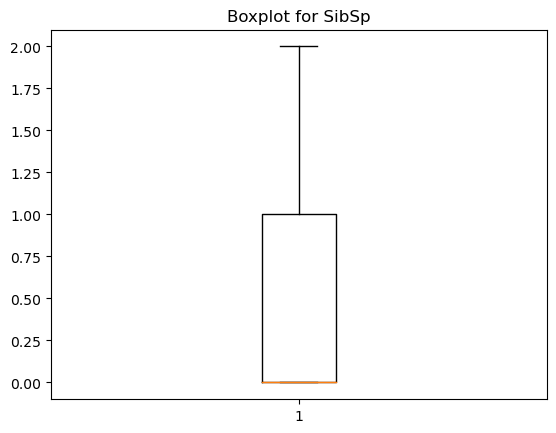

In [33]:
plt.boxplot(data['SibSp'])
plt.title('Boxplot for SibSp')

Text(0.5, 1.0, 'Boxplot for Fare')

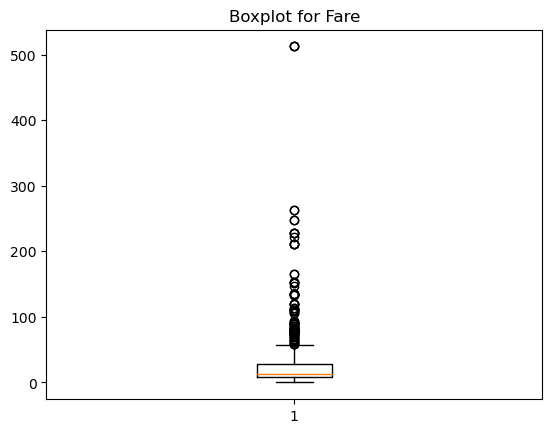

In [34]:
# 3. Fare
plt.boxplot(data['Fare'])
plt.title('Boxplot for Fare')

In [35]:
Q1=np.percentile(data['Fare'],25)
Q2=np.percentile(data['Fare'],50)
Q3=np.percentile(data['Fare'],75)
IQR=Q3-Q1
low_limit=Q1-1.5*IQR
upr_lim=Q3+1.5*IQR


In [36]:
outlier=[]
for x in data['Fare']:
    if ((x>upr_lim)or(x<low_limit)):
        outlier.append(x)

In [38]:
ind5=data['Fare']<low_limit
data=data.drop(data.loc[ind5].index)
ind6=data['Fare']>upr_lim
data=data.drop(data.loc[ind6].index)

Text(0.5, 1.0, 'Boxplot for Fare')

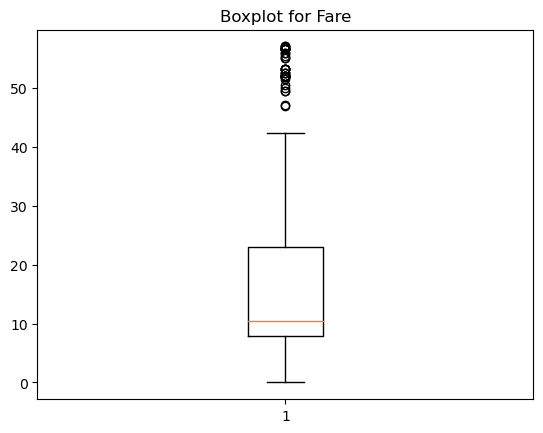

In [39]:
plt.boxplot(data['Fare'])
plt.title('Boxplot for Fare')

### 6 - Do min max scaling on the feature set (Take ‘Survived’ as target)

In [40]:
data1=pd.read_csv(r"C:\Users\msham\Documents\Data science\Assignment 4 on preprocessing\titanic_dataset.csv")

In [41]:
data1.Ticket.nunique()

681

In [42]:
data1.Name.nunique()

891

In [43]:
data1.Fare.nunique()

248

In [44]:
data1.Cabin.nunique()

147

In [45]:
for i in ['Cabin','Embarked']:
    data1[i]=data1[i].fillna(data1[i].mode().iloc[0])

In [46]:
for i in ['Age']:
    data1[i]=data1[i].fillna(data1[i].median())

In [47]:
data1.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [48]:
x = data1.drop('Survived',axis=1)
y = data1['Survived']

In [49]:
x = x.drop('Name',axis=1)
x = x.drop('Ticket',axis=1)

In [50]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,3,male,22.0,1,0,7.2500,B96 B98,S
1,2,1,female,38.0,1,0,71.2833,C85,C
2,3,3,female,26.0,0,0,7.9250,B96 B98,S
3,4,1,female,35.0,1,0,53.1000,C123,S
4,5,3,male,35.0,0,0,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...
886,887,2,male,27.0,0,0,13.0000,B96 B98,S
887,888,1,female,19.0,0,0,30.0000,B42,S
888,889,3,female,28.0,1,2,23.4500,B96 B98,S
889,890,1,male,26.0,0,0,30.0000,C148,C


In [51]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
x['Sex'] = label_encoder.fit_transform(x['Sex'])
x['Cabin'] = label_encoder.fit_transform(x['Cabin'])
x['Embarked'] = label_encoder.fit_transform(x['Embarked'])
x1 = x.drop(['Sex','Cabin','Embarked'],axis=1)
x1

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,28.0,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [52]:
from sklearn.preprocessing import MinMaxScaler
min_max= MinMaxScaler(feature_range = (0,1))
x1= min_max.fit_transform(x1)
x1 = pd.DataFrame(x1)
x1.describe()

,0,1,2,3,4,5
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.500000,0.654321,0.363679,0.065376,0.063599,0.062858
std,0.289162,0.418036,0.163605,0.137843,0.134343,0.096995
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.500000,0.271174,0.000000,0.000000,0.015440
50%,0.500000,1.000000,0.346569,0.000000,0.000000,0.028213
75%,0.750000,1.000000,0.434531,0.125000,0.000000,0.060508
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [53]:
x=x.drop(['PassengerId','Pclass','Age','SibSp','Parch','Fare'],axis=1)
x=pd.concat([x,x1],axis = 1)
x.head()

,Sex,Cabin,Embarked,0,1,2,3,4,5
0,1,47,2,0.000000,1.0,0.271174,0.125,0.0,0.014151
1,0,81,0,0.001124,0.0,0.472229,0.125,0.0,0.139136
2,0,47,2,0.002247,1.0,0.321438,0.000,0.0,0.015469
3,0,55,2,0.003371,0.0,0.434531,0.125,0.0,0.103644
4,1,47,2,0.004494,1.0,0.434531,0.000,0.0,0.015713
